In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
df["target"]=iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [7]:
df0=df[df.target==0].shape


In [8]:
df1=df[df.target==1].shape

In [9]:
df['flower_name'] =df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
i=df[df.target==0]
s=df[df.target==1]

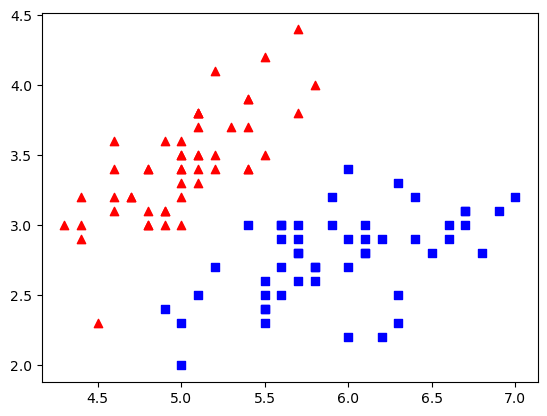

In [15]:
plt.scatter(i["sepal length (cm)"], i["sepal width (cm)"],color="red",marker="^")
plt.scatter(s["sepal length (cm)"], s["sepal width (cm)"],color="blue",marker="s")

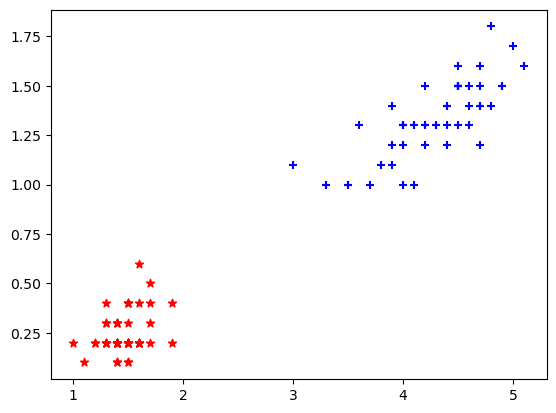

In [16]:
plt.scatter(i["petal length (cm)"], i["petal width (cm)"],color="red",marker="*")
plt.scatter(s["petal length (cm)"], s["petal width (cm)"],color="blue",marker="+")

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x=df.drop(["target","flower_name"],axis=1)
y=df.target


In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [20]:
from sklearn.svm import SVC
model=SVC()
model

SVC()

In [21]:
model.fit(x_train,y_train)

SVC()

In [22]:
model.score(x_train,y_train)

0.9666666666666667

In [23]:
import warnings
warnings.filterwarnings("ignore", message="X does not have valid feature names, but SVC was fitted with feature names")


In [24]:
model.predict([[1,1,1,1]])

array([0])

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
knn = KNeighborsClassifier(n_neighbors=5)

In [30]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [31]:
knn.score(x_train,y_train)

0.9666666666666667

In [33]:
import warnings
warnings.filterwarnings("ignore", message="X does not have valid feature names, but KNeighborsClassifier was fitted with feature names")


In [34]:
knn.predict([[4.8,3.0,1.5,0.3]])

array([0])

In [43]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 7,  0,  0],
       [ 0, 11,  1],
       [ 0,  0, 11]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

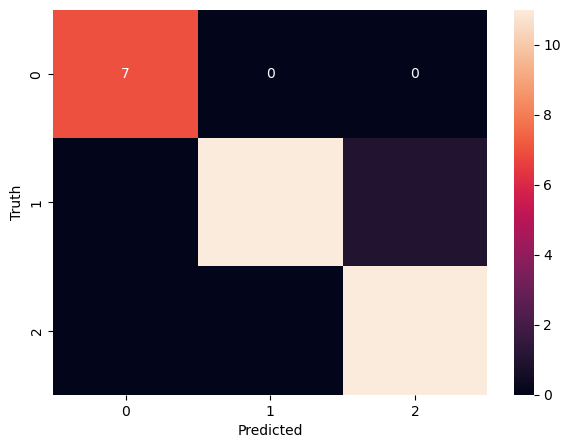

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [53]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.92      0.96        12
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

